In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
newDf = pd.read_csv("newDataset2.csv")
newDf.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,...,merchCloseness,custCloseness,custPageRank,merchPageRank,custBetweeness,merchBetweeness,merchlouvain,custlouvain,merchCommunity,custCommunity
0,139,'C1464489812','4','M','28007','M1535107174','28007','es_wellnessandbeauty',11.14,0,...,0.404936,0.498500,1.346716,59.156668,1999.714539,202779.58240,12,12,193099,193099
1,34,'C577335130','4','M','28007','M348934600','28007','es_transportation',58.79,0,...,0.431867,0.481987,1.094457,69.076432,1334.870350,206175.30350,0,0,193099,193099
2,147,'C861856179','1','M','28007','M85975013','28007','es_food',37.23,0,...,0.404197,0.461886,0.899949,51.639943,373.352416,104954.61310,5,0,196561,193099
3,123,'C1791524453','2','F','28007','M348934600','28007','es_transportation',26.84,0,...,0.431867,0.481522,0.713861,69.076432,405.411677,206175.30350,0,0,193099,193099
4,81,'C738091100','2','F','28007','M50039827','28007','es_health',197.28,0,...,0.372130,0.331973,0.478898,33.186495,15.319557,62893.55384,12,12,193099,193099


In [3]:
newDf.isnull().values.any()

False

In [4]:
''' Inplace Shuffling the data in dataframe'''
newDf = newDf.sample(frac=1).reset_index(drop=True)

In [6]:
'''Fetching unique value report'''
newDf.nunique()

step                 180
customer            3938
age                    8
gender                 4
zipcodeOri             1
merchant              50
zipMerchant            1
category              15
amount             20662
fraud                  2
merchDegree           49
custDegree            30
merchCloseness        49
custCloseness        805
custPageRank        2094
merchPageRank         50
custBetweeness      2088
merchBetweeness       50
merchlouvain           4
custlouvain            4
merchCommunity         2
custCommunity          2
dtype: int64

In [7]:
''' Report of Data'''
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188835 entries, 0 to 188834
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   step             188835 non-null  int64  
 1   customer         188835 non-null  object 
 2   age              188835 non-null  object 
 3   gender           188835 non-null  object 
 4   zipcodeOri       188835 non-null  object 
 5   merchant         188835 non-null  object 
 6   zipMerchant      188835 non-null  object 
 7   category         188835 non-null  object 
 8   amount           188835 non-null  float64
 9   fraud            188835 non-null  int64  
 10  merchDegree      188835 non-null  int64  
 11  custDegree       188835 non-null  int64  
 12  merchCloseness   188835 non-null  float64
 13  custCloseness    188835 non-null  float64
 14  custPageRank     188835 non-null  float64
 15  merchPageRank    188835 non-null  float64
 16  custBetweeness   188835 non-null  floa

In [8]:
classes=newDf['fraud']

In [9]:
graphDF =  newDf.drop(['step','age','gender','zipcodeOri', 'zipMerchant', 'customer','fraud'], axis = 1)
graphDF= pd.get_dummies(graphDF,columns=['category','merchant'])
graphDF.shape

(188835, 78)

In [10]:
graphDF.head()

,amount,merchDegree,custDegree,merchCloseness,custCloseness,custPageRank,merchPageRank,custBetweeness,merchBetweeness,merchlouvain,...,merchant_'M732195782',merchant_'M78078399',merchant_'M840466850',merchant_'M855959430',merchant_'M857378720',merchant_'M85975013',merchant_'M923029380',merchant_'M933210764',merchant_'M97925176',merchant_'M980657600'
0,16.81,2680,26,0.431867,0.498250,0.855741,69.076432,1344.599019,2.061753e+05,0,...,0,0,0,0,0,0,0,0,0,0
1,54.01,2188,44,0.409932,0.487647,1.238713,55.279171,1586.716243,1.210124e+05,5,...,0,0,0,0,0,0,0,0,0,0
2,34.72,2188,34,0.409932,0.410946,0.937081,55.279171,303.702307,1.210124e+05,5,...,0,0,0,0,0,0,0,0,0,0
3,28.81,2188,32,0.409932,0.473740,0.943718,55.279171,519.490654,1.210124e+05,5,...,0,0,0,0,0,0,0,0,0,0
4,19.03,5456,8,0.617565,0.465445,0.395127,212.158616,126.313333,2.152318e+06,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [12]:
'''Normalizing the data'''
normalization = StandardScaler()

graphModifiedDF = pd.DataFrame(normalization.fit_transform(graphDF), columns = graphDF.columns)
graphModifiedDF.head()

,amount,merchDegree,custDegree,merchCloseness,custCloseness,custPageRank,merchPageRank,custBetweeness,merchBetweeness,merchlouvain,...,merchant_'M732195782',merchant_'M78078399',merchant_'M840466850',merchant_'M855959430',merchant_'M857378720',merchant_'M85975013',merchant_'M923029380',merchant_'M933210764',merchant_'M97925176',merchant_'M980657600'
0,-0.194507,0.131640,0.021738,-0.002934,1.027634,0.335257,-0.068826,1.943244,-0.212988,-0.968593,...,-0.056834,-0.092674,-0.086394,-0.182676,-0.025426,-0.182521,-0.041393,-0.019119,-0.033997,-0.097245
1,-0.001645,-0.364211,2.189963,-0.368283,0.683680,2.310497,-0.380431,2.540648,-0.361353,0.470243,...,-0.056834,-0.092674,-0.086394,-0.182676,-0.025426,-0.182521,-0.041393,-0.019119,-0.033997,-0.097245
2,-0.101653,-0.364211,0.985394,-0.368283,-1.804278,0.754780,-0.380431,-0.625078,-0.361353,0.470243,...,-0.056834,-0.092674,-0.086394,-0.182676,-0.025426,-0.182521,-0.041393,-0.019119,-0.033997,-0.097245
3,-0.132293,-0.364211,0.744480,-0.368283,0.232598,0.789012,-0.380431,-0.092639,-0.361353,0.470243,...,-0.056834,-0.092674,-0.086394,-0.182676,-0.025426,-0.182521,-0.041393,-0.019119,-0.033997,-0.097245
4,-0.182997,2.929367,-2.146486,3.090000,-0.036492,-2.040436,3.162615,-1.062770,3.177471,-0.393059,...,-0.056834,-0.092674,-0.086394,-0.182676,-0.025426,-0.182521,-0.041393,-0.019119,-0.033997,-0.097245


In [42]:
def classify_with_kmeans(model,graphModifiedDF,classes):
    '''Training Random Forest of Raw and Graph Features by first clustering and classifying next'''
    from sklearn.cluster import KMeans
    X_trn, X_tst, y_trn, y_tst = train_test_split(graphModifiedDF, classes, test_size=0.20)
    print(type(X_trn))

    n_clusters = len(np.unique(y_trn))
    test = KMeans(n_clusters = n_clusters, random_state=42)
    test.fit(X_trn)

    y_lbls_trn = test.labels_
    y_lbls_tst = test.predict(X_tst)
    for i,j in enumerate(y_lbls_trn):
        X_trn[i] += y_lbls_trn[i]
    for i,j in enumerate(y_lbls_tst):
        X_tst[i] += y_lbls_tst[i]
    print(X_tst.shape)

    clf = model.fit(X_trn, y_trn)
    predictions = clf.predict(X_tst) 
    print(class_accuracy( list(y_tst), predictions))
    print(accuracy_score(y_tst, predictions) )
    print(classification_report(y_tst, predictions))
    return clf

In [32]:
def classify_with_model(model,graphModifiedDF):
    ''' Training Random Forest of Raw and Graph Features included dataset'''
    X_trn, X_tst, y_trn, y_tst = train_test_split(graphModifiedDF, classes, test_size=0.20)

    clf = model.fit(X_trn, y_trn)
    predictions = model.predict(X_tst)
    print(class_accuracy( list(y_tst), predictions)) 
    print(accuracy_score(y_tst, predictions) )
    print(classification_report(y_tst, predictions))
    return clf

In [15]:
''' Method to determine accuarcy of fraud and non-fraud separately'''
def class_accuracy(original,predicted):
    correct_1=0
    correct_0=0
    total_1=0
    total_0=0
    for i in range(len(original)):
        if original[i]==1 :
            total_1+=1
            if predicted[i]==1:
                correct_1+=1
        elif original[i]==0 :
            total_0+=1
            if predicted[i]==0:
                correct_0+=1
    accuracy_1=(correct_1/total_1)
    accuracy_0=(correct_0/total_0)
    return [accuracy_1,accuracy_0]

In [39]:
def compute_feature_importance(clf_enhanced,graphDF):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import pyplot
    matplotlib.rcParams.update({'font.size': 22})
    importances = clf_enhanced.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf_enhanced.estimators_],
                axis=0)
    indices = np.argsort(importances)[::-1]
    test = list(graphDF.columns[indices[0:7]])
    plt.figure(figsize=(60,15))
    plt.xlabel("Feature Name", fontsize=30)
    plt.ylabel("Importance ", fontsize=30)
    plt.bar(test, importances[indices[0:7]],
        color="orange", align="center")
    #plt.xticks(range(5), graphDF.columns[indices[0:5]].values())
    plt.xlim([-1, 7])
    plt.show()

In [22]:
''' Method for calculating the average for only one classifier'''
def calculate_average_for_fold(fold_data, model_names):
    model_1_sum = 0
    model_2_sum = 0

    for dat in fold_data:
        model_1_sum += dat[model_names[0]]/len(fold_data)
        model_2_sum += dat[model_names[1]]/len(fold_data)

    print("Model {} average: {}".format(model_names[0], model_1_sum))
    print("Model {} average: {}".format(model_names[1], model_2_sum))

In [23]:
''' Method for calculating the average for multiple classifier'''
def calculate_average_for_classes(fold_data_classes,model_names):
    model_1_sum_1 = 0
    model_1_sum_0 = 0
    model_2_sum_1 = 0
    model_2_sum_0 = 0

    for data in fold_data_classes:
        model_1_sum_1 += data[model_names[0]][0]/len(fold_data_classes)
        model_1_sum_0 += data[model_names[0]][1]/len(fold_data_classes)
        model_2_sum_1 += data[model_names[1]][0]/len(fold_data_classes)
        model_2_sum_0 += data[model_names[1]][1]/len(fold_data_classes)
    
    print('classes1')
    print("Model {} average: {}".format(model_names[0], model_1_sum_1))
    print('classes0')
    print("Model {} average: {}".format(model_names[0], model_1_sum_0))
    print('classes1')
    print("Model {} average: {}".format(model_names[1], model_2_sum_1))
    print('classes0')
    print("Model {} average: {}".format(model_names[1], model_2_sum_0))

In [19]:
from sklearn.model_selection import * 
from sklearn.metrics import fbeta_score, accuracy_score,precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [28]:
'''Training the models on baseline features'''
''' Cross Validation on SVM and RF Models'''
kf = KFold(n_splits=5)
fold_betas = []
fold_accuracy = []
fold_classes_accuracy=[]
kf.get_n_splits(graphModifiedDF)

for train_index, test_index in kf.split(graphModifiedDF):
    X_train, X_test = graphModifiedDF.iloc[train_index], graphModifiedDF.iloc[test_index]
    y_train, y_test = classes.iloc[train_index], classes.iloc[test_index]
    clfSVM = SVC()
    clfSVM.fit(X_train,y_train)
    clfRandomForest = RandomForestClassifier()
    clfRandomForest.fit(X_train,y_train)
    
    predictionsSVM = clfSVM.predict(X_test)
    predictionsRF = clfRandomForest.predict(X_test)
    fold_betas.append({"SVM": fbeta_score( y_test, predictionsSVM, average='macro', beta=1),
                       "RF": fbeta_score( y_test, predictionsRF, average='macro', beta=1) })
    
    fold_accuracy.append({"SVM": accuracy_score( y_test, predictionsSVM),
                       "RF": accuracy_score(y_test, predictionsRF) })
    fold_classes_accuracy.append({"SVM": class_accuracy( list(y_test), predictionsSVM),
                       "RF": class_accuracy(list(y_test), predictionsRF) })
    print('SVM Report')
    print(classification_report(y_test, predictionsSVM))
    print('RF Report')
    print(classification_report(y_test, predictionsRF))
    
print(fold_classes_accuracy)

SVM Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36331
           1       0.90      0.77      0.83      1436

    accuracy                           0.99     37767
   macro avg       0.95      0.88      0.91     37767
weighted avg       0.99      0.99      0.99     37767

RF Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36331
           1       0.88      0.82      0.85      1436

    accuracy                           0.99     37767
   macro avg       0.94      0.91      0.92     37767
weighted avg       0.99      0.99      0.99     37767

SVM Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36262
           1       0.89      0.76      0.82      1505

    accuracy                           0.99     37767
   macro avg       0.94      0.88      0.91     37767
weighted avg       0.99      0.99      0.9

In [29]:
print("---------- Betas Average ----------")
calculate_average_for_fold(fold_betas, ["SVM", "RF"])
print("---------- Accuracy Averages -----------")
calculate_average_for_fold(fold_accuracy, ["SVM", "RF"])
print("---------- Classes Accuracy Averages -----------")
calculate_average_for_classes(fold_classes_accuracy, ["SVM", "RF"])


---------- Betas Average ----------
Model SVM average: 0.9127675732375807
Model RF average: 0.9230973019057414
---------- Accuracy Averages -----------
Model SVM average: 0.9880689490825323
Model RF average: 0.9891174835173564
---------- Classes Accuracy Averages -----------
classes1
Model SVM average: 0.7726434910770053
classes0
Model SVM average: 0.9966137519760392
classes1
Model RF average: 0.8203300493288876
classes0
Model RF average: 0.9958157785358985


In [33]:
from xgboost import XGBClassifier
xgClassify = classify_with_model(XGBClassifier(),graphModifiedDF)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[00:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8172484599589322, 0.9966672175398006]
0.9897264807901077
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36306
           1       0.91      0.82      0.86      1461

    accuracy

# Optimization Of Algorithm Utilizing Hyperparameter

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

In [36]:
''' Improving RF by utilizing Hyperparameters'''

''' Spliting the data into training and testing data'''
XTrn, XTst, yTrn, yTst = train_test_split(graphModifiedDF, 
                                                    classes, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

classifer = RandomForestClassifier()
classifer2 = RandomForestClassifier()

classifer2.fit(XTrn, yTrn)

predictions = classifer2.predict(XTst)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
arguments = {'n_estimators': [5, 10 , 100],
              'min_samples_split': [2, 10, 50],
              'max_features': ["sqrt", "log2"],
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
f1_score = make_scorer(fbeta_score, beta=1)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
gridObject = GridSearchCV(classifer, param_grid=arguments, scoring=f1_score)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
fitGrid = gridObject.fit(XTrn, yTrn)

# Get the estimator
bestClassifer = fitGrid.best_estimator_

# Make predictions using the unoptimized and model
predictions = (classifer.fit(XTrn, yTrn)).predict(XTst)
relevantPredictions = bestClassifer.predict(XTst)


In [37]:
''' Printing the report'''
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(yTst, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(yTst, predictions, beta = 1)))
print("Accuracy score on the testing data for Classes 1:"+str(class_accuracy(list(yTst), predictions)[0]))
print("Accuracy score on the testing data for Classes 0:"+str(class_accuracy(list(yTst), predictions)[1]))
print('RF Report')
print(classification_report(yTst, predictions))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(yTst, relevantPredictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(yTst, relevantPredictions, beta = 1)))
print("Accuracy score on the testing data for Classes 1:"+str(class_accuracy(list(yTst), relevantPredictions)[0]))
print("Accuracy score on the testing data for Classes 0:"+str(class_accuracy(list(yTst), relevantPredictions)[1]))
print('RF Optimized Report')
print(classification_report(yTst, relevantPredictions))

Unoptimized model
------
Accuracy score on testing data: 0.9893
F-score on testing data: 0.8486
Accuracy score on the testing data for Classes 1:0.8204941860465116
Accuracy score on the testing data for Classes 0:0.9957132257975874
RF Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36391
           1       0.88      0.82      0.85      1376

    accuracy                           0.99     37767
   macro avg       0.94      0.91      0.92     37767
weighted avg       0.99      0.99      0.99     37767


Optimized Model
------
Final accuracy score on the testing data: 0.9899
Final F-score on the testing data: 0.8565
Accuracy score on the testing data for Classes 1:0.8284883720930233
Accuracy score on the testing data for Classes 0:0.9959880190156907
RF Optimized Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36391
           1       0.89      0.83      0.86      13

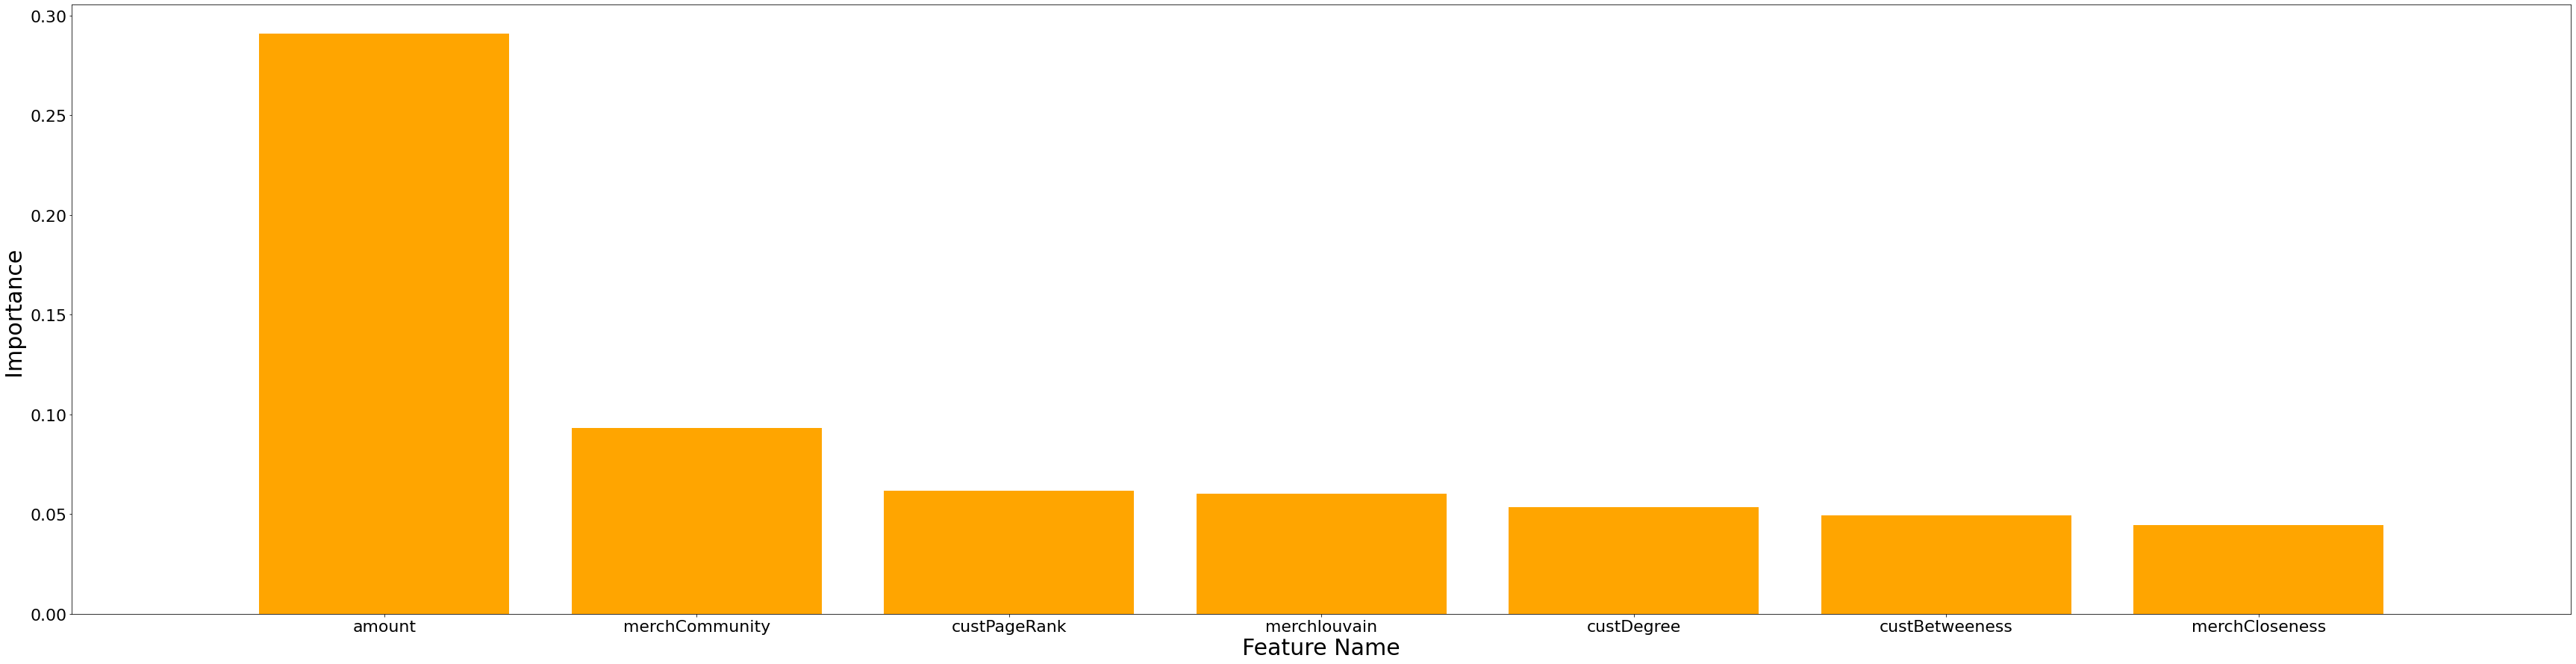

In [43]:
compute_feature_importance(bestClassifer,graphModifiedDF)

In [44]:
rf_with_kmeans = classify_with_kmeans(bestClassifer,graphModifiedDF.values,classes.values)

<class 'numpy.ndarray'>
(37767, 78)
[0.8154385964912281, 0.9965054207253315]
0.9896735245055207
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36342
           1       0.90      0.82      0.86      1425

    accuracy                           0.99     37767
   macro avg       0.95      0.91      0.93     37767
weighted avg       0.99      0.99      0.99     37767



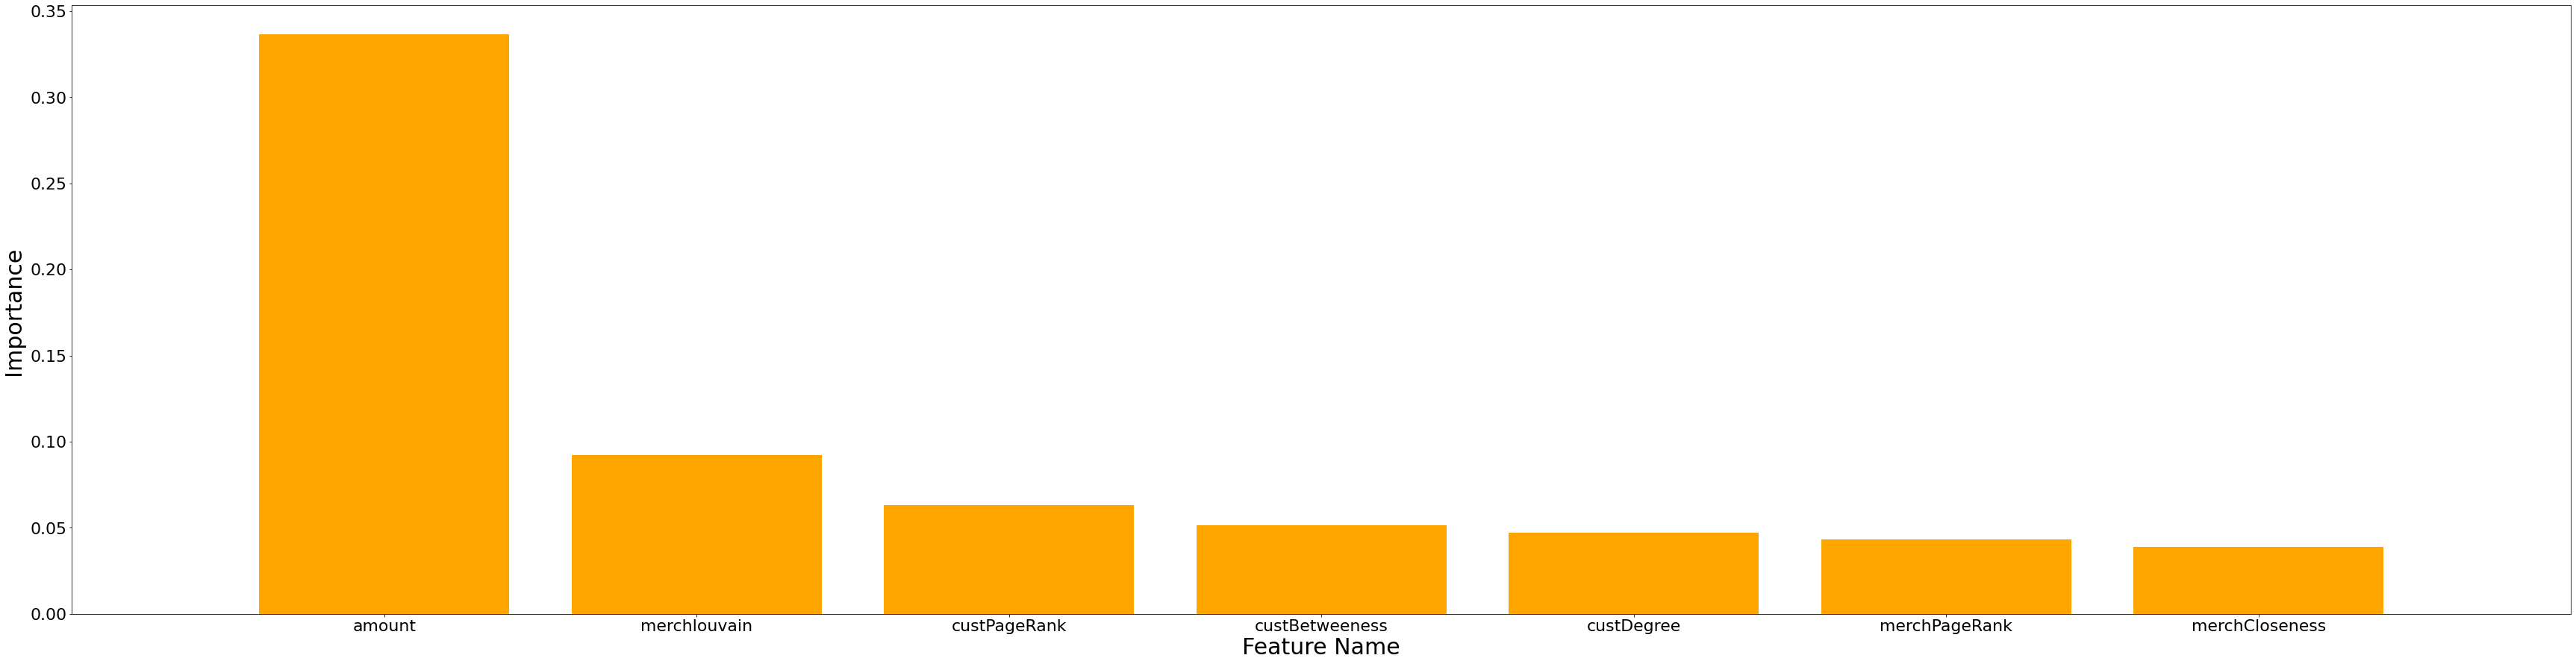

In [45]:
compute_feature_importance(rf_with_kmeans,graphModifiedDF)